# Preprocessing Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Calling input dataset
df = pd.read_csv('REDSBU_PV_2022.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Datetime,IntSolIrr (W/m^2),TmpAmb C (°C),TmpMdul C (°C),WindVel m/s (m/s),A.Ms.Amp (A),A.Ms.Vol (V),A.Ms.Watt (W)
0,2022-01-17 10:45:00,112.290,4.270,2.940,1.980,0.840,289.300,242.330
1,2022-01-17 10:50:00,106.260,4.410,3.150,2.110,0.800,289.640,231.760
2,2022-01-17 10:55:00,92.130,4.470,3.180,1.450,0.720,283.880,203.970
3,2022-01-17 11:00:00,87.380,4.350,3.050,1.330,0.700,283.270,196.120
4,2022-01-17 11:05:00,76.240,4.190,2.800,2.400,0.610,276.890,168.860
...,...,...,...,...,...,...,...,...
35867,2022-09-06 16:40:00,441.929,35.510,42.212,1.533,3.394,188.567,632.744
35868,2022-09-06 16:45:00,419.476,35.238,41.607,1.762,3.914,179.480,700.762
35869,2022-09-06 16:50:00,402.556,36.450,41.317,1.281,4.173,180.074,750.389
35870,2022-09-06 16:55:00,373.588,37.065,40.653,0.553,3.778,177.602,669.118


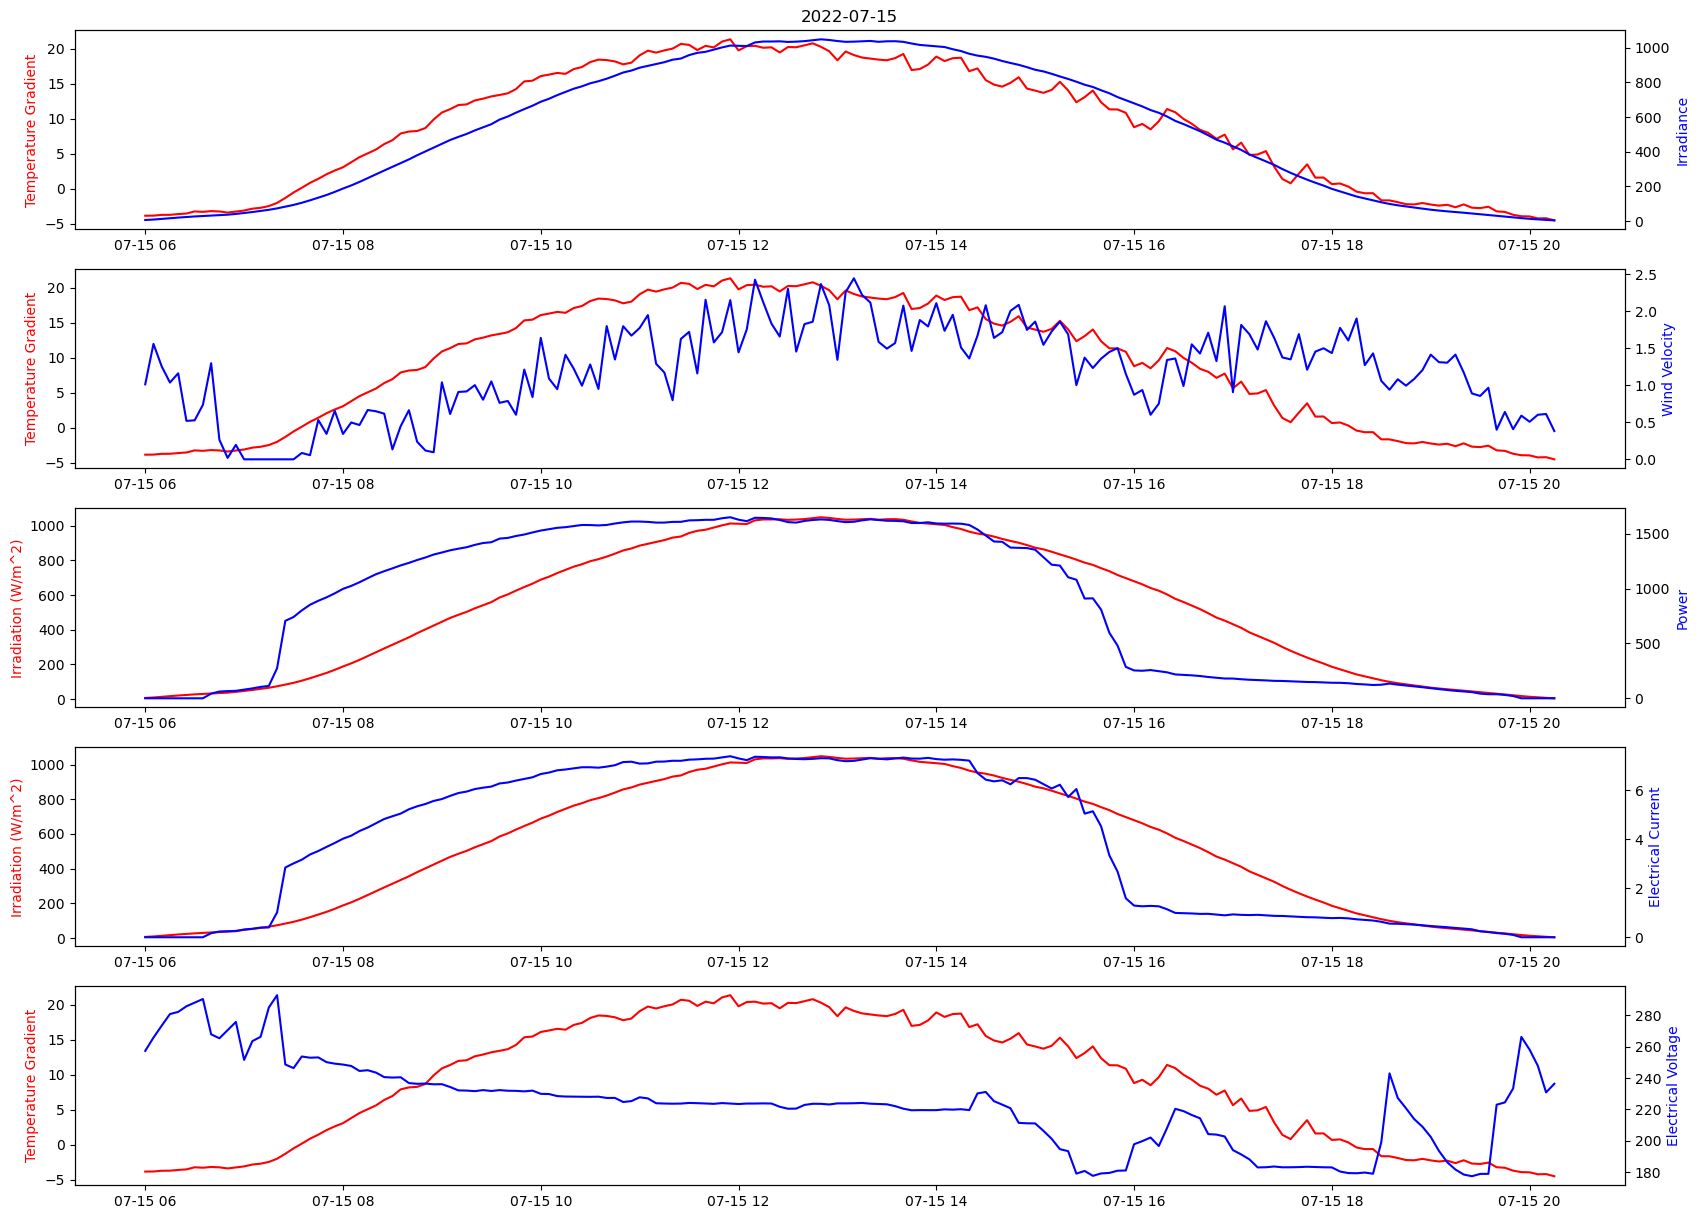

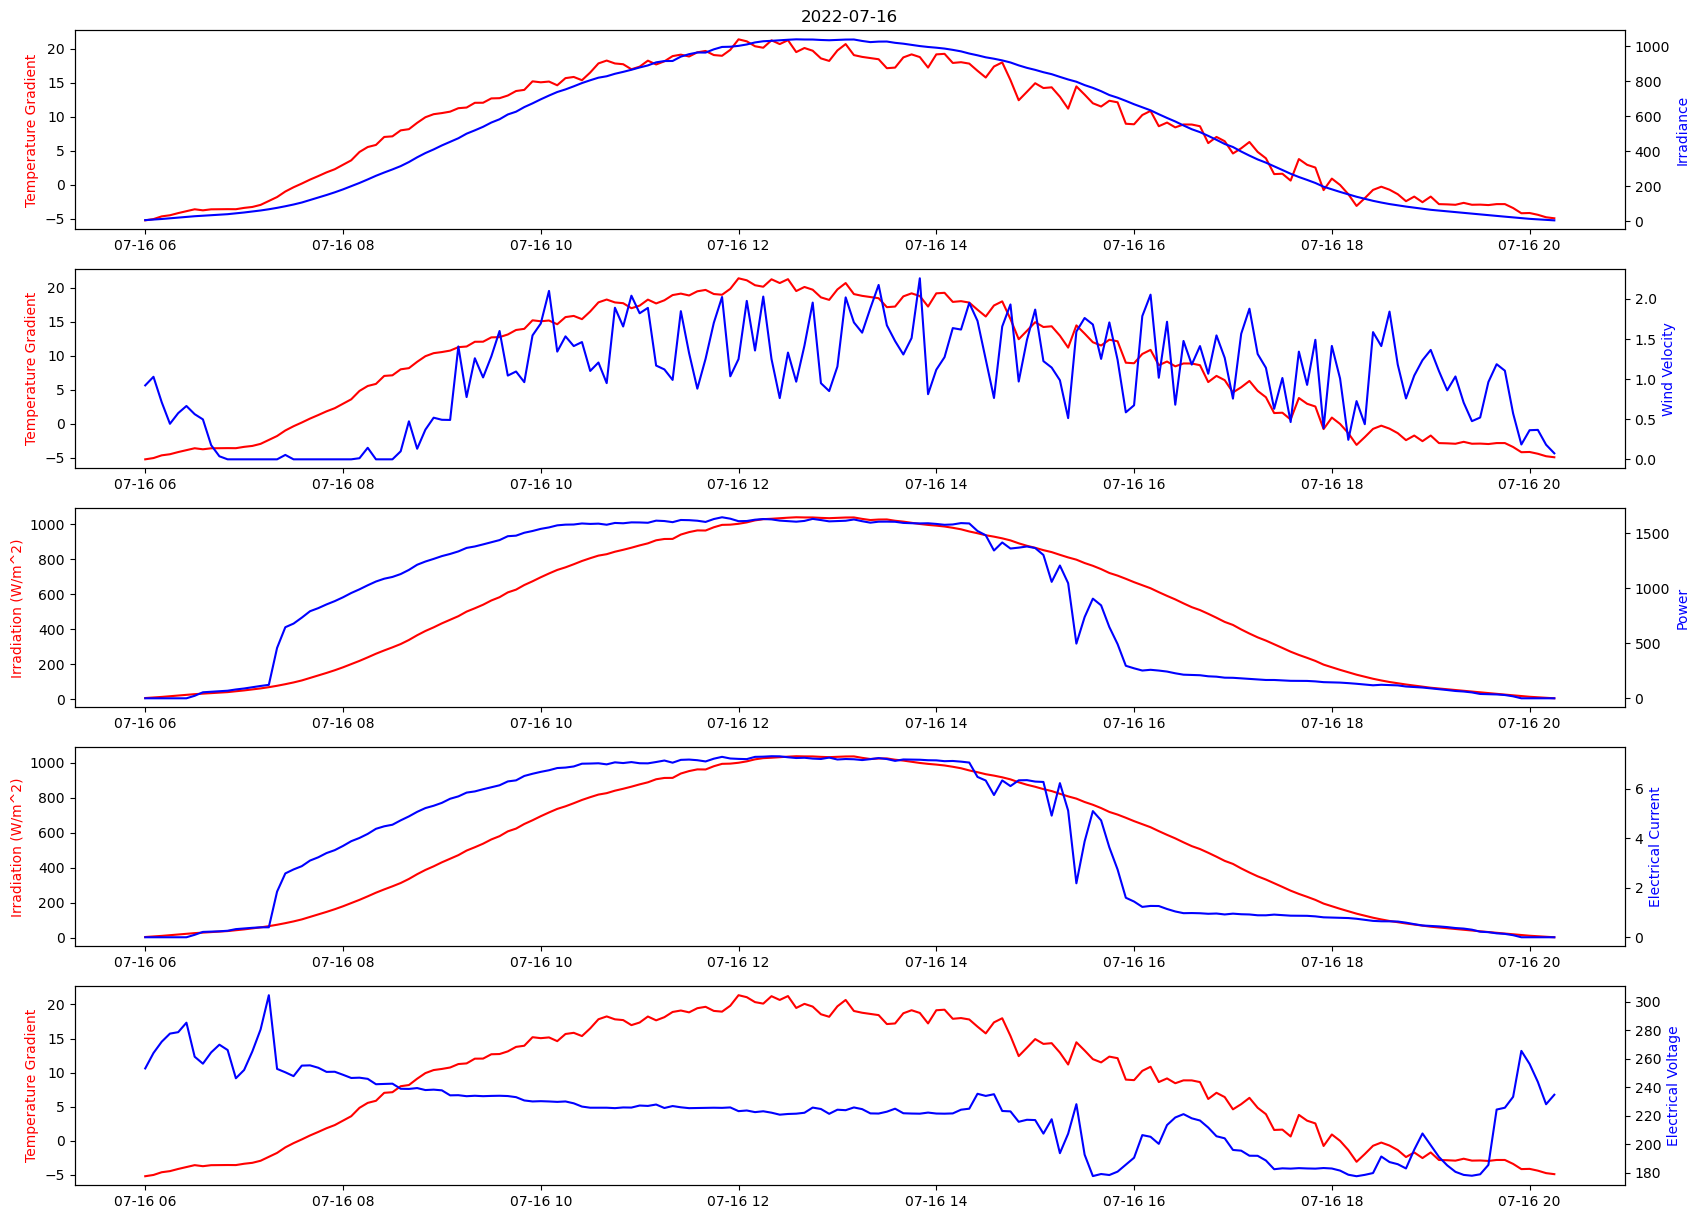

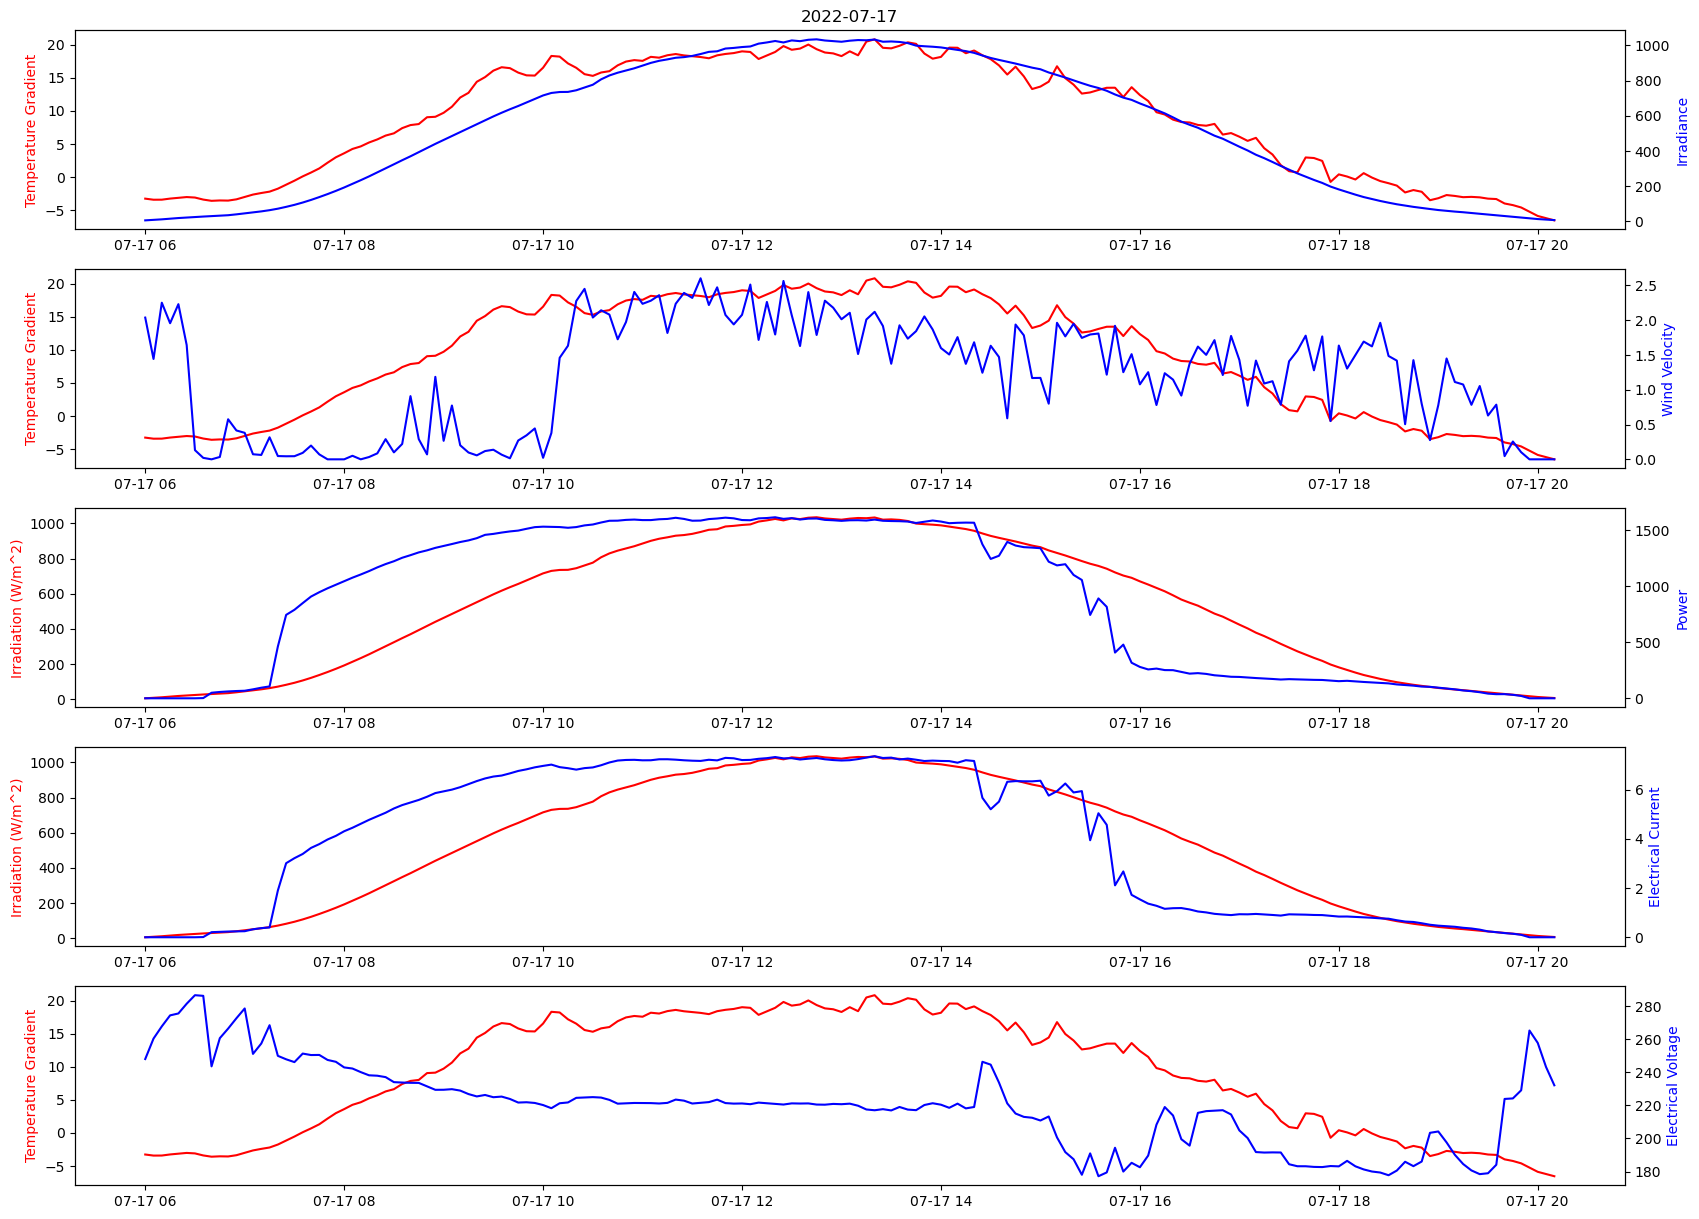

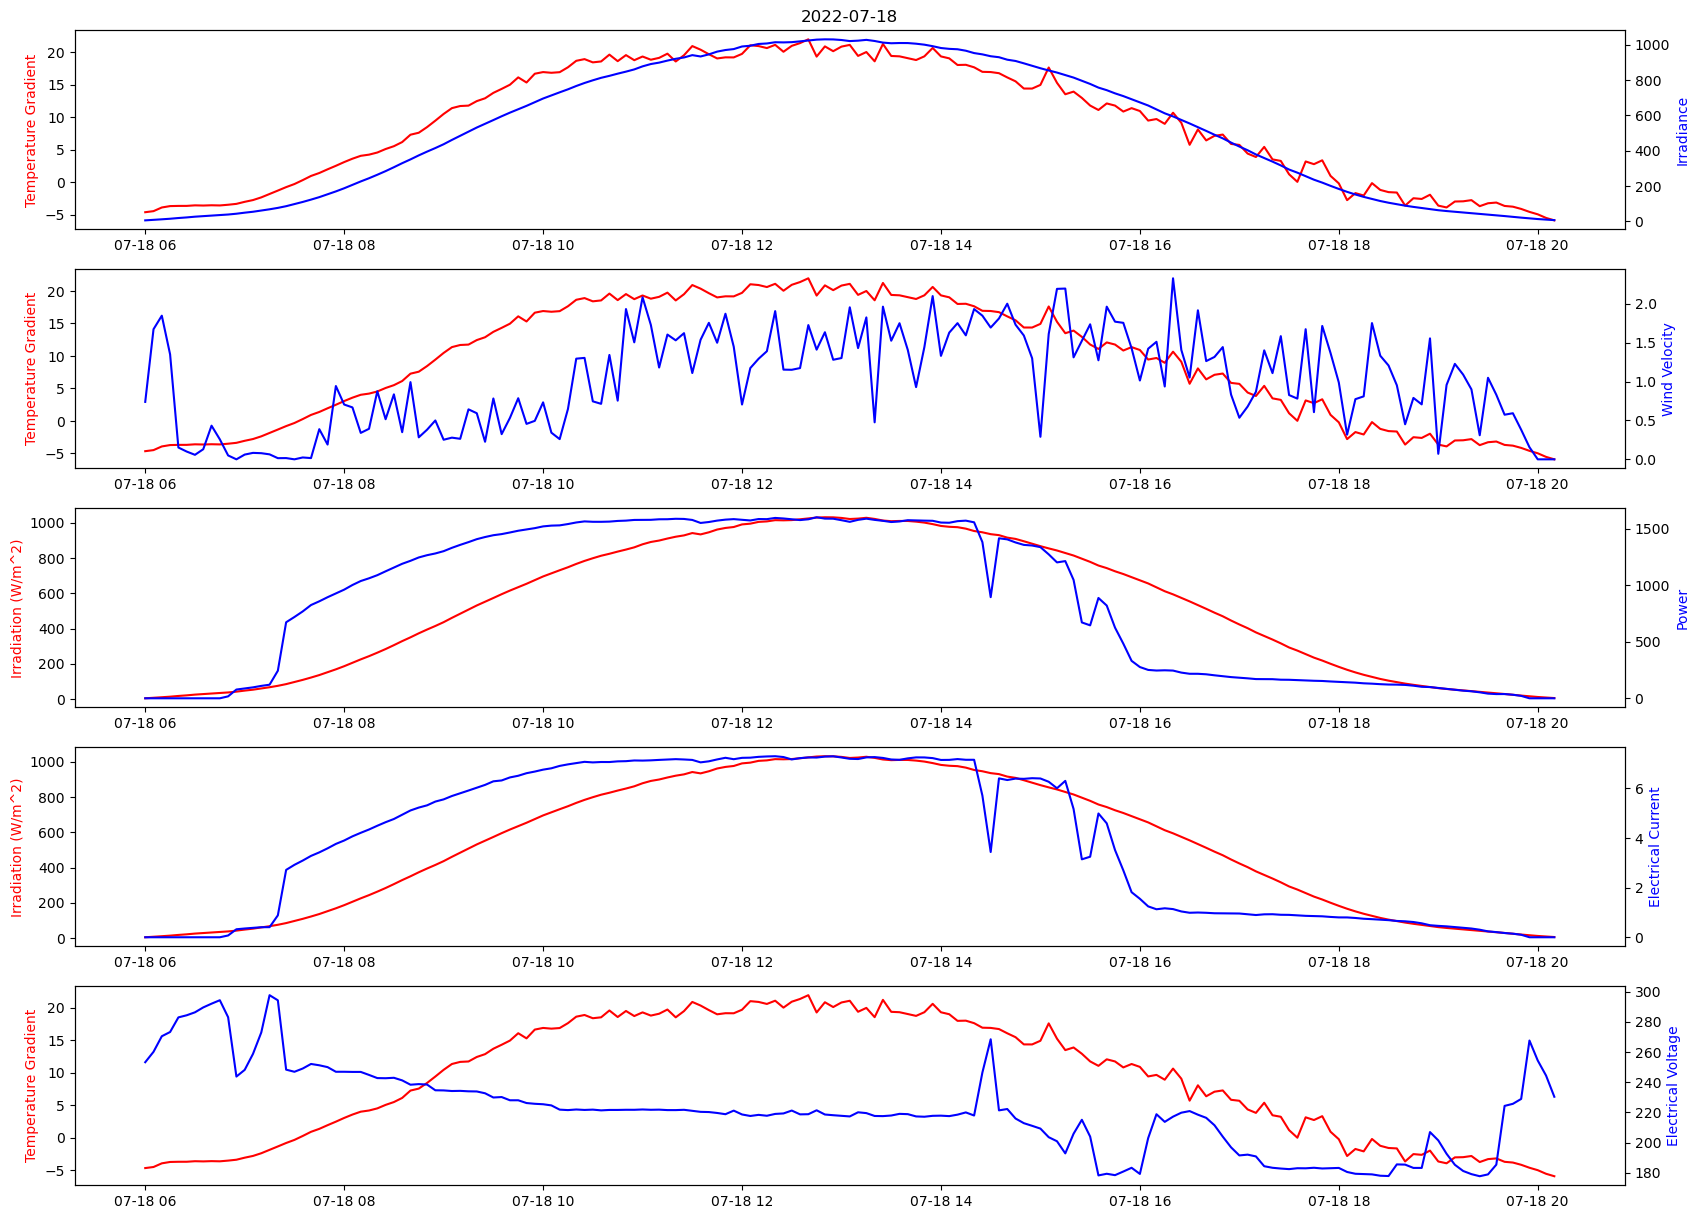

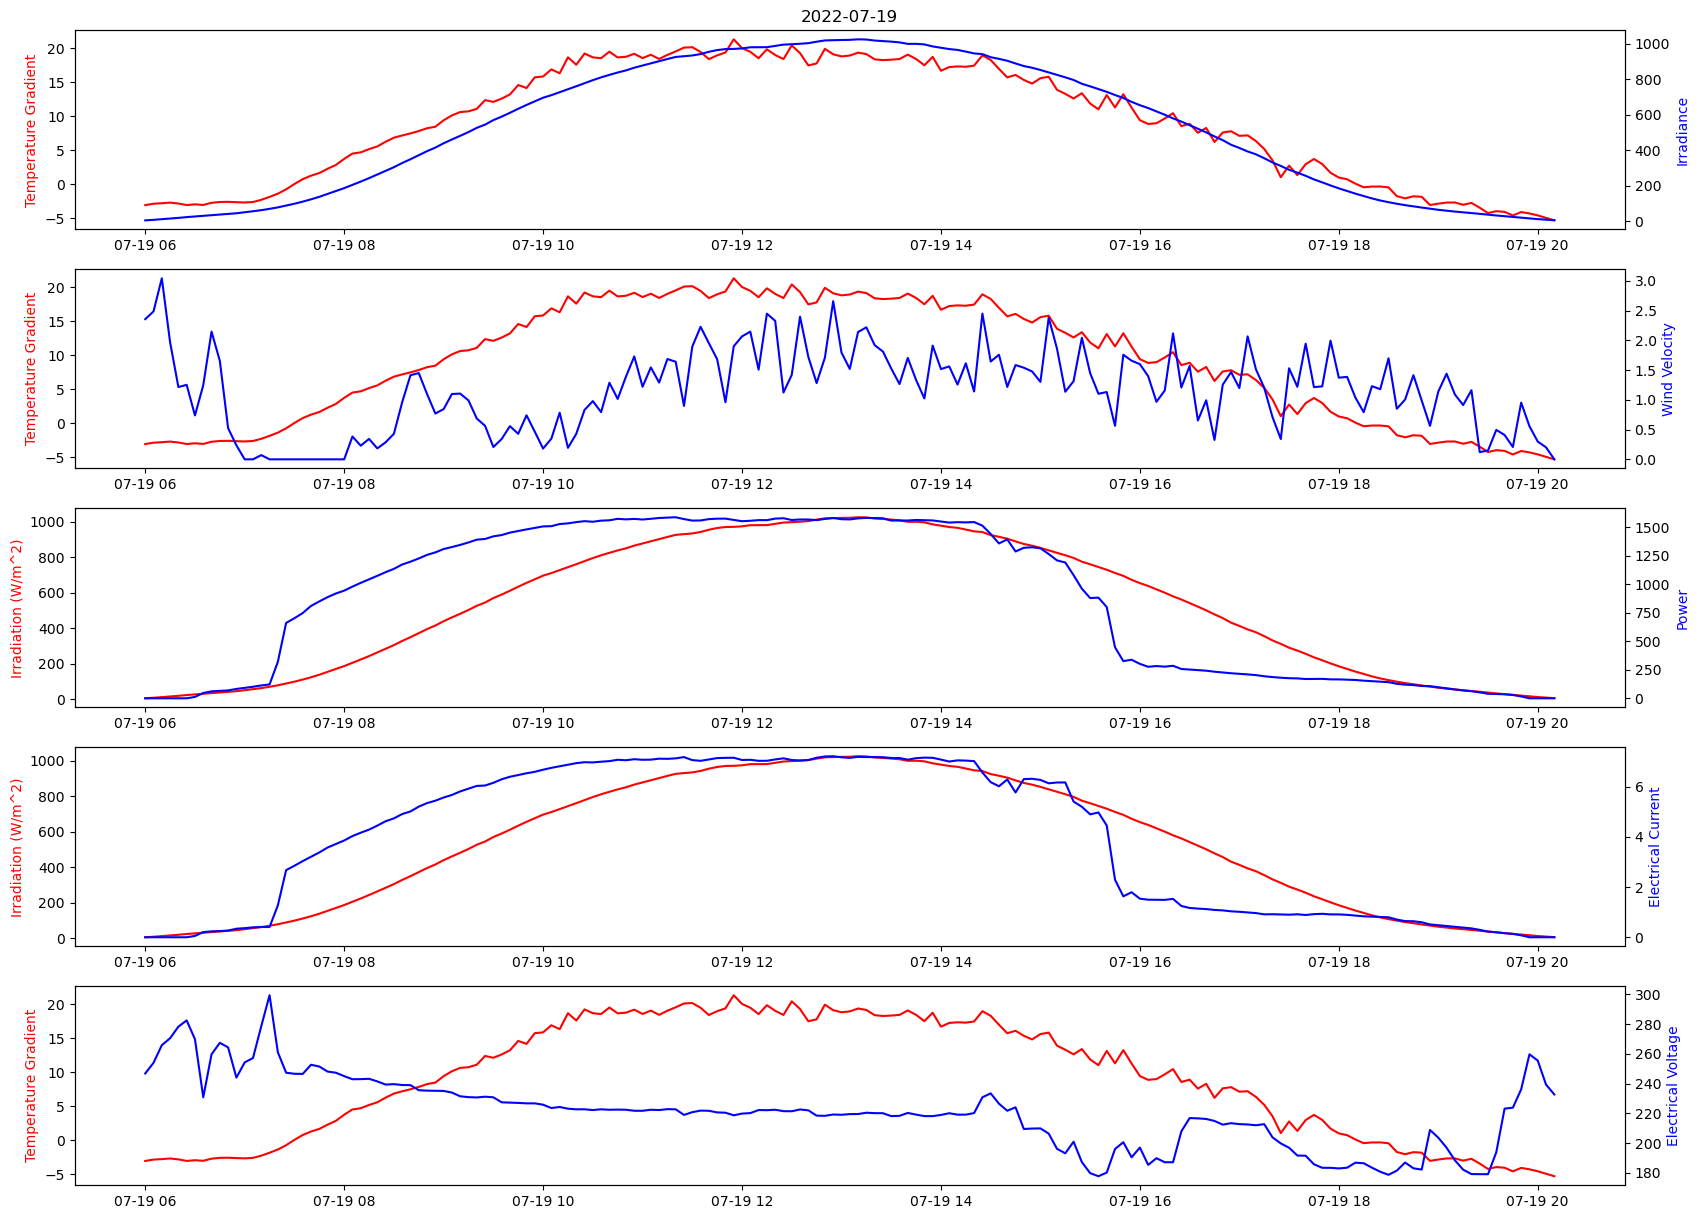

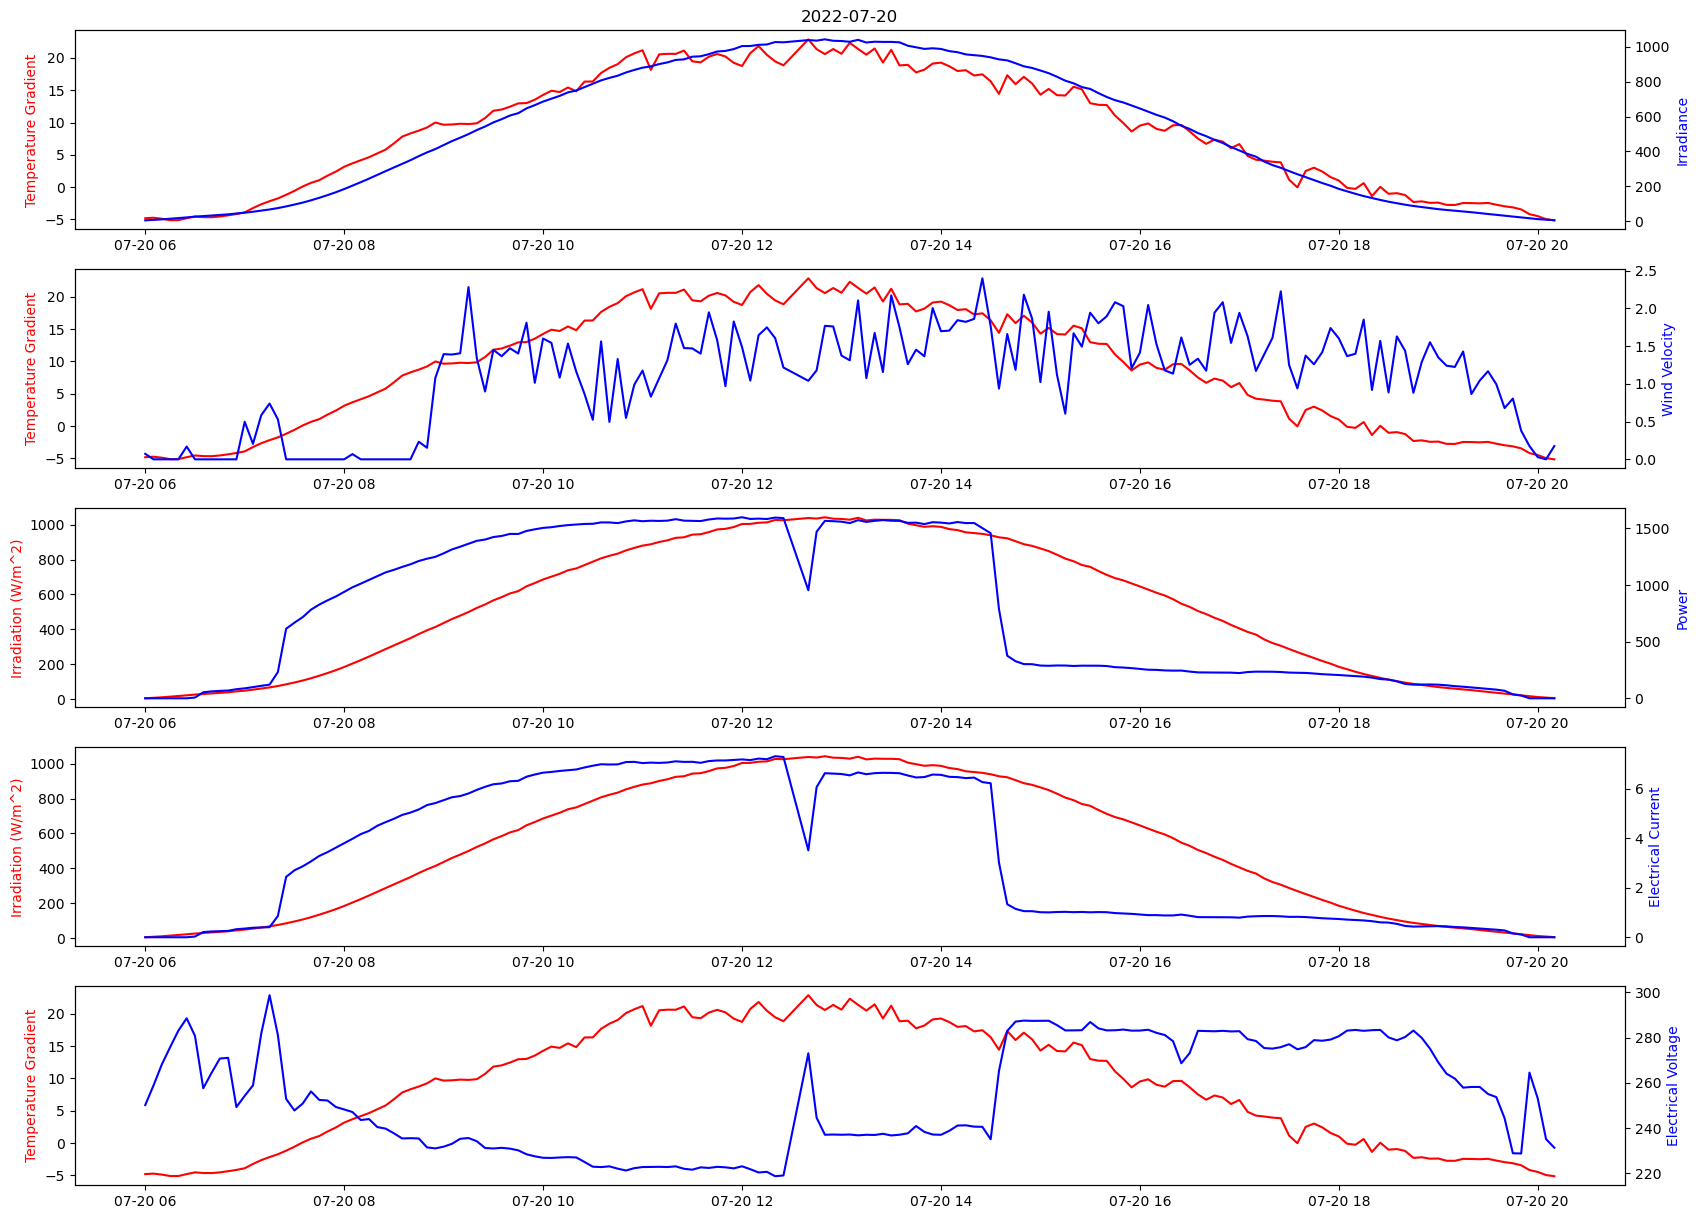

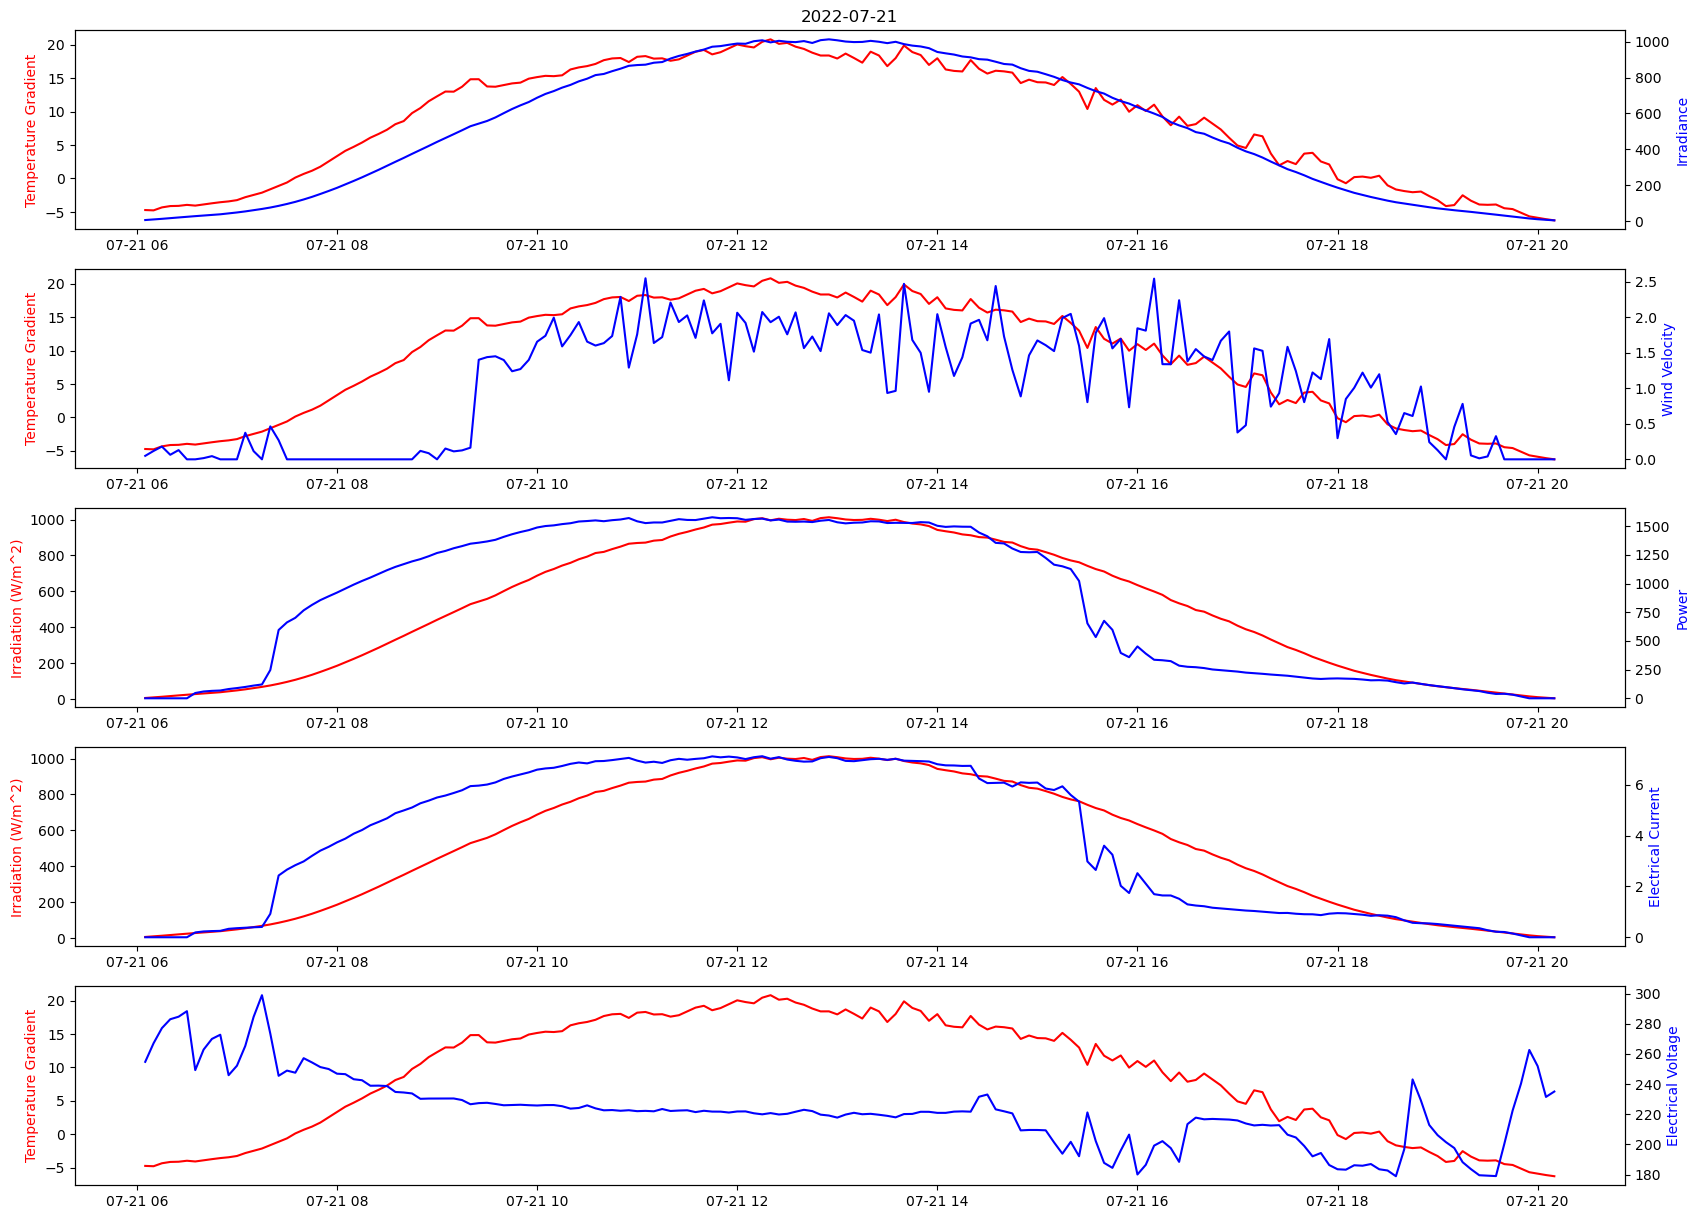

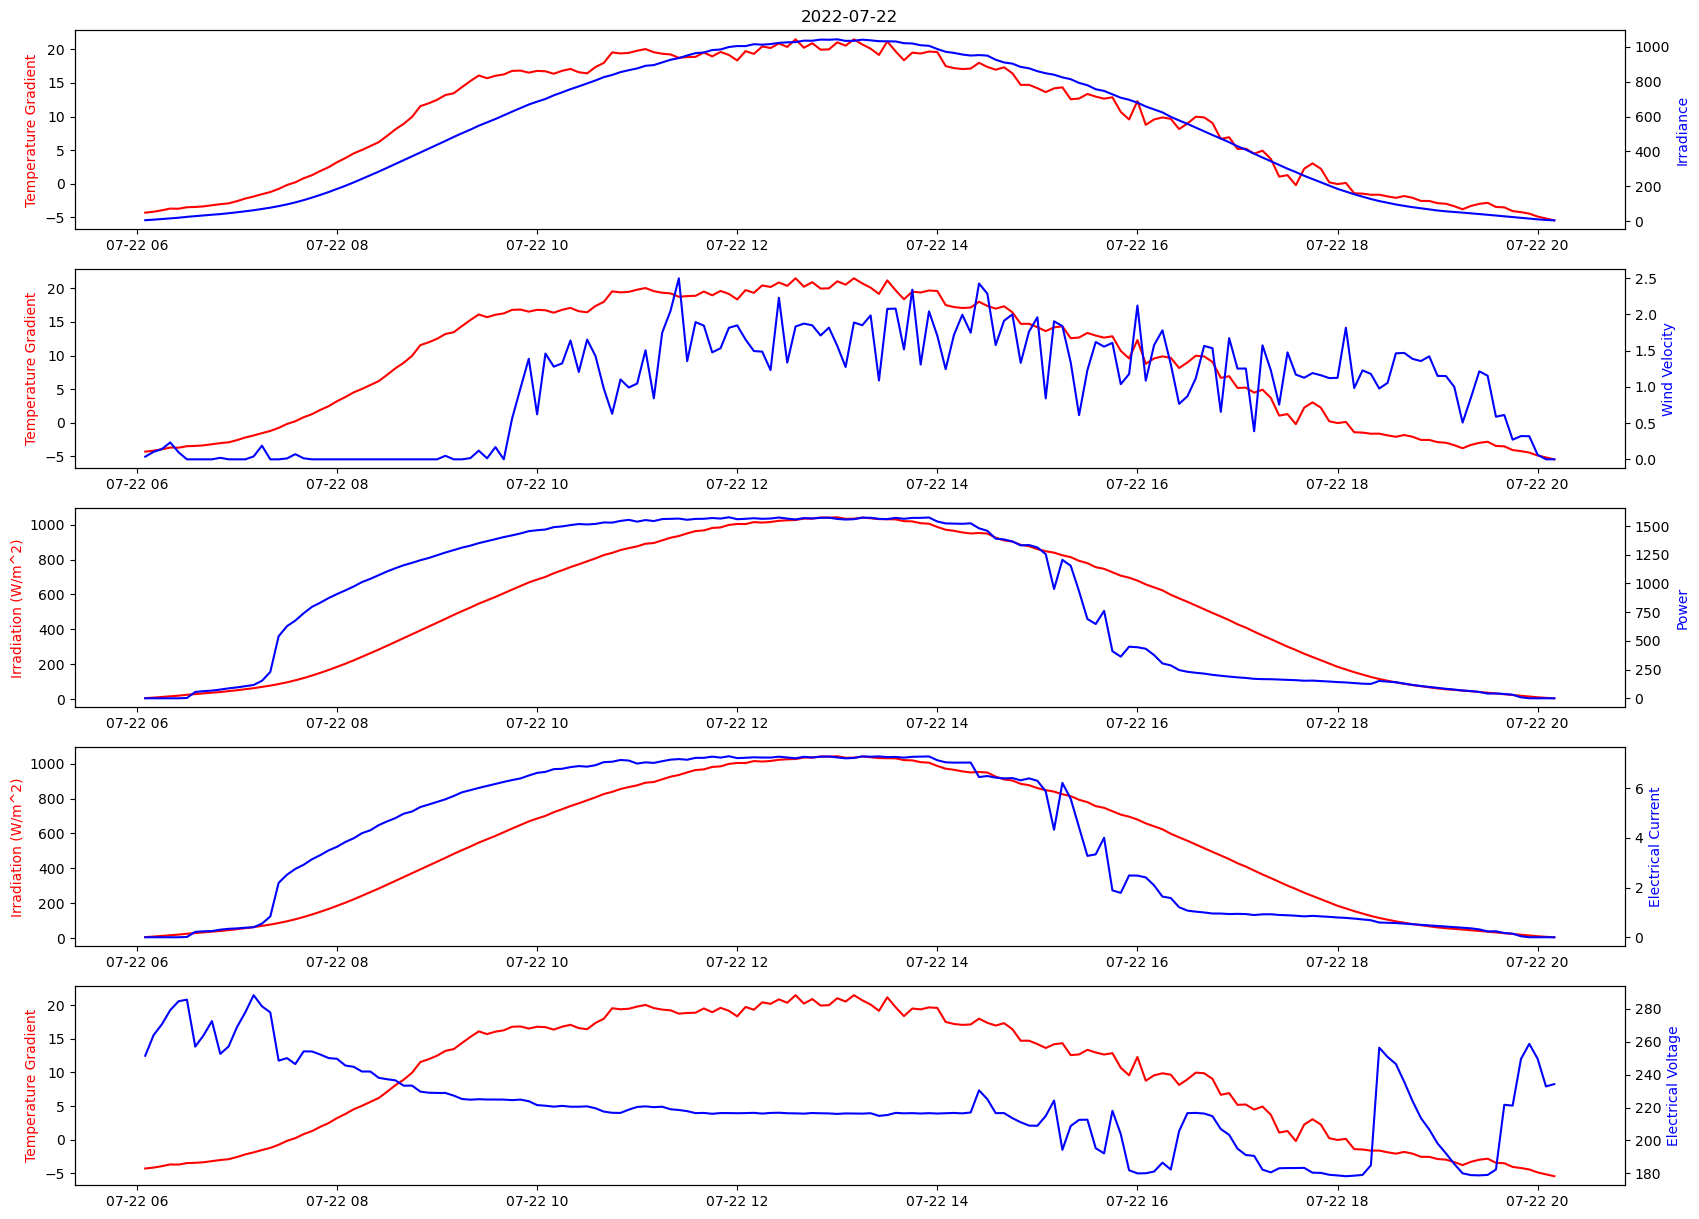

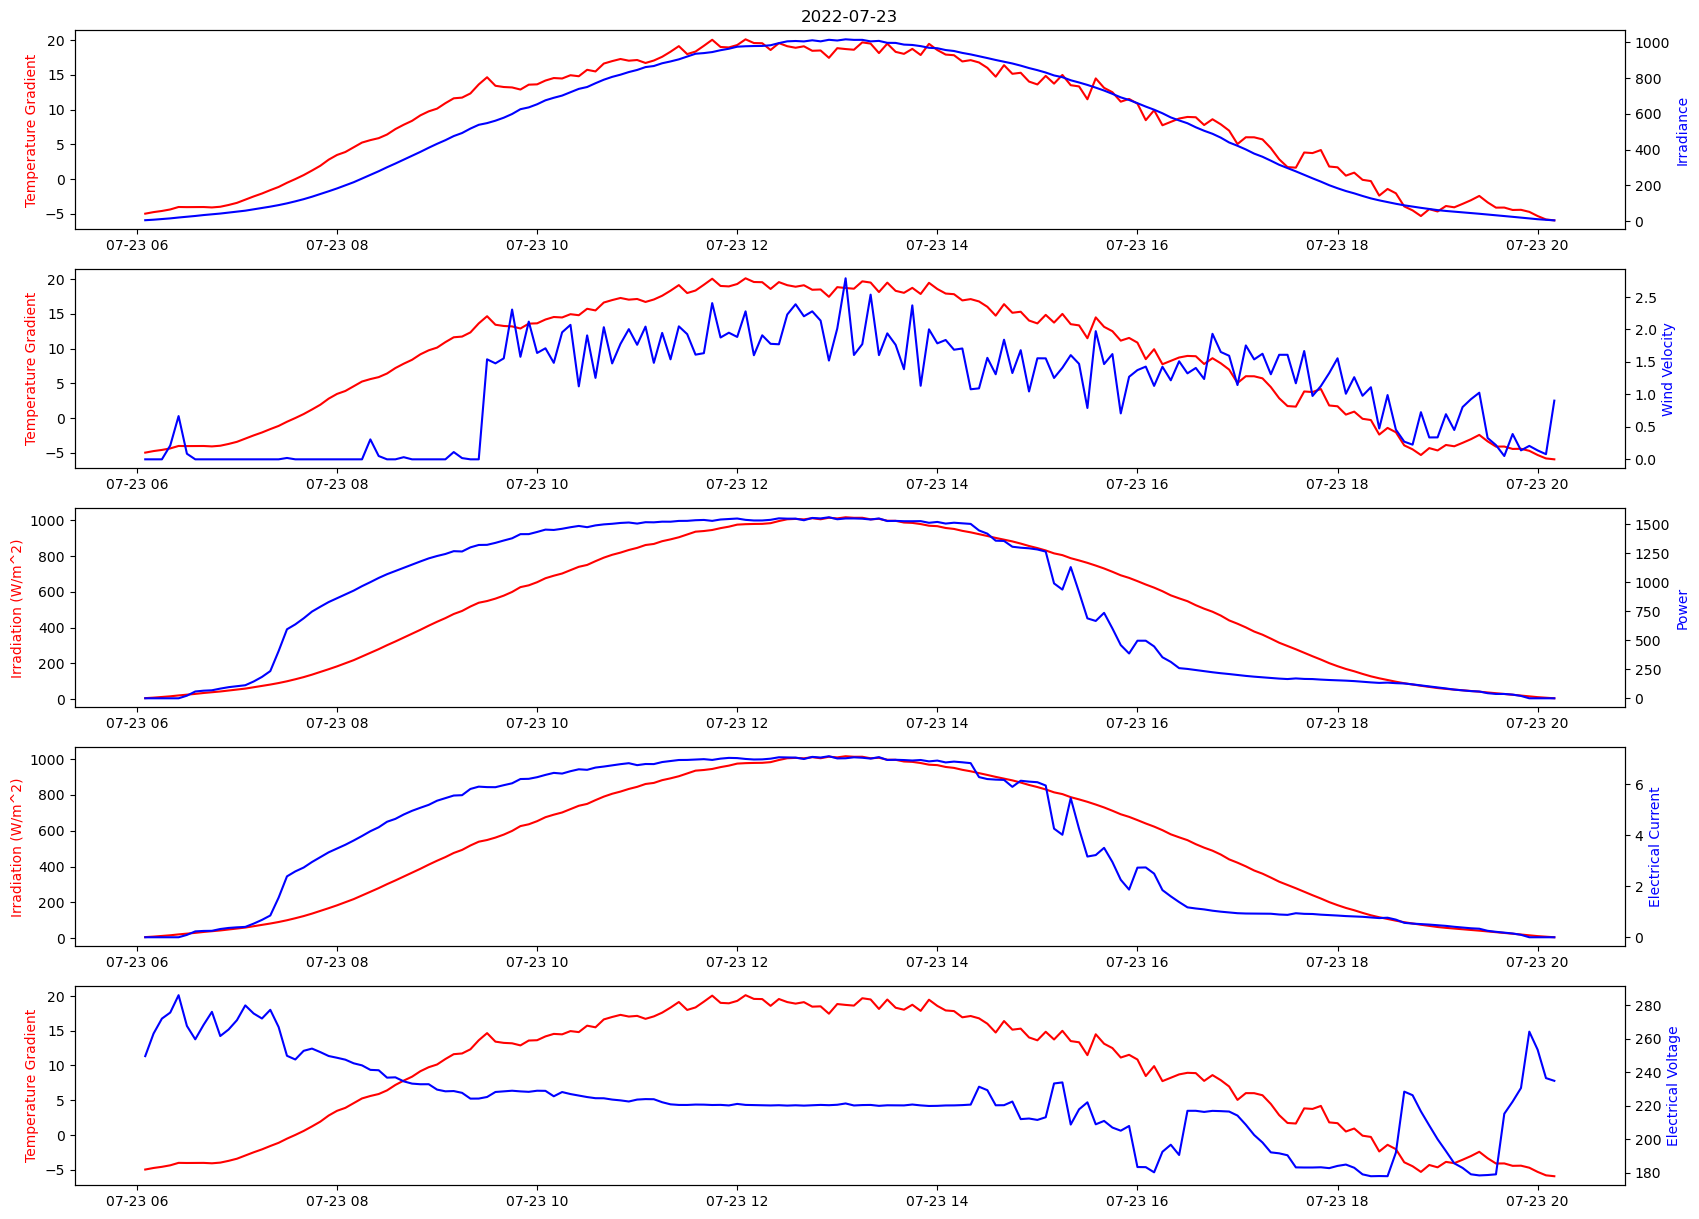

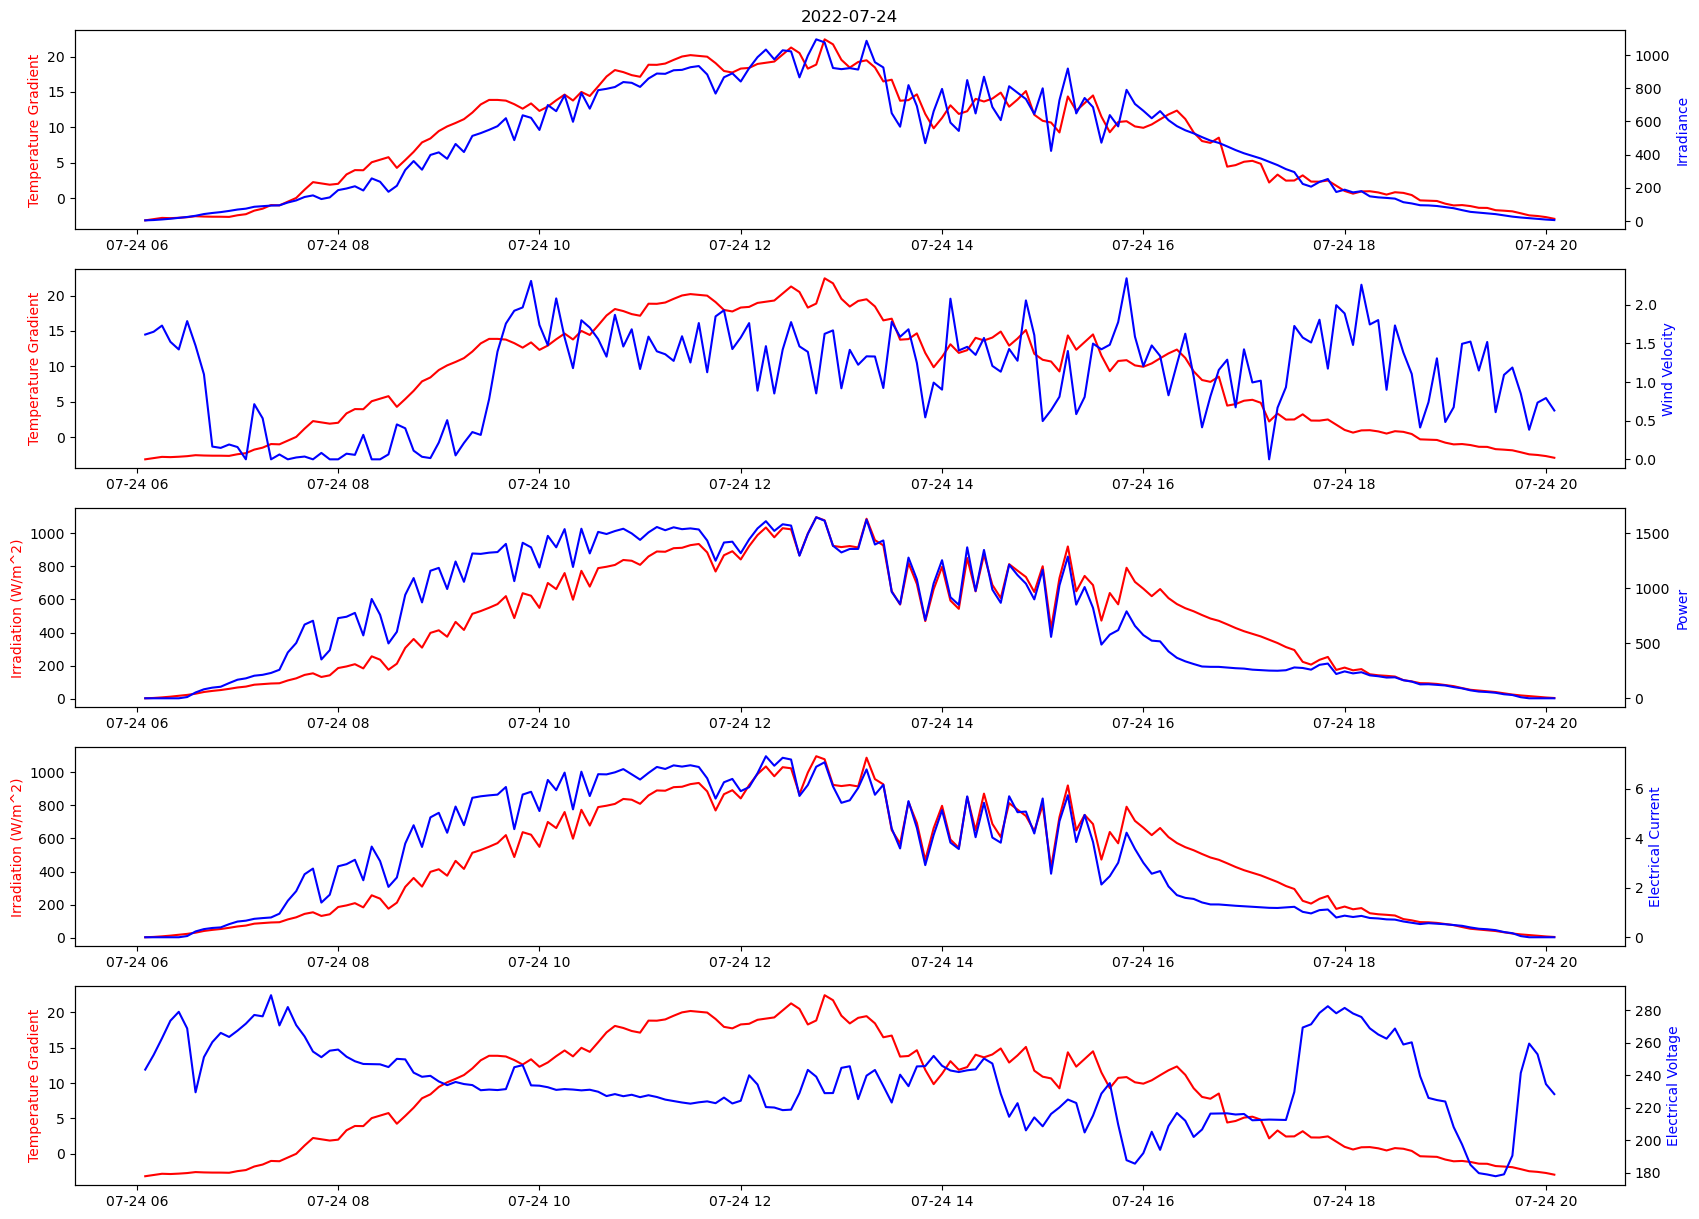

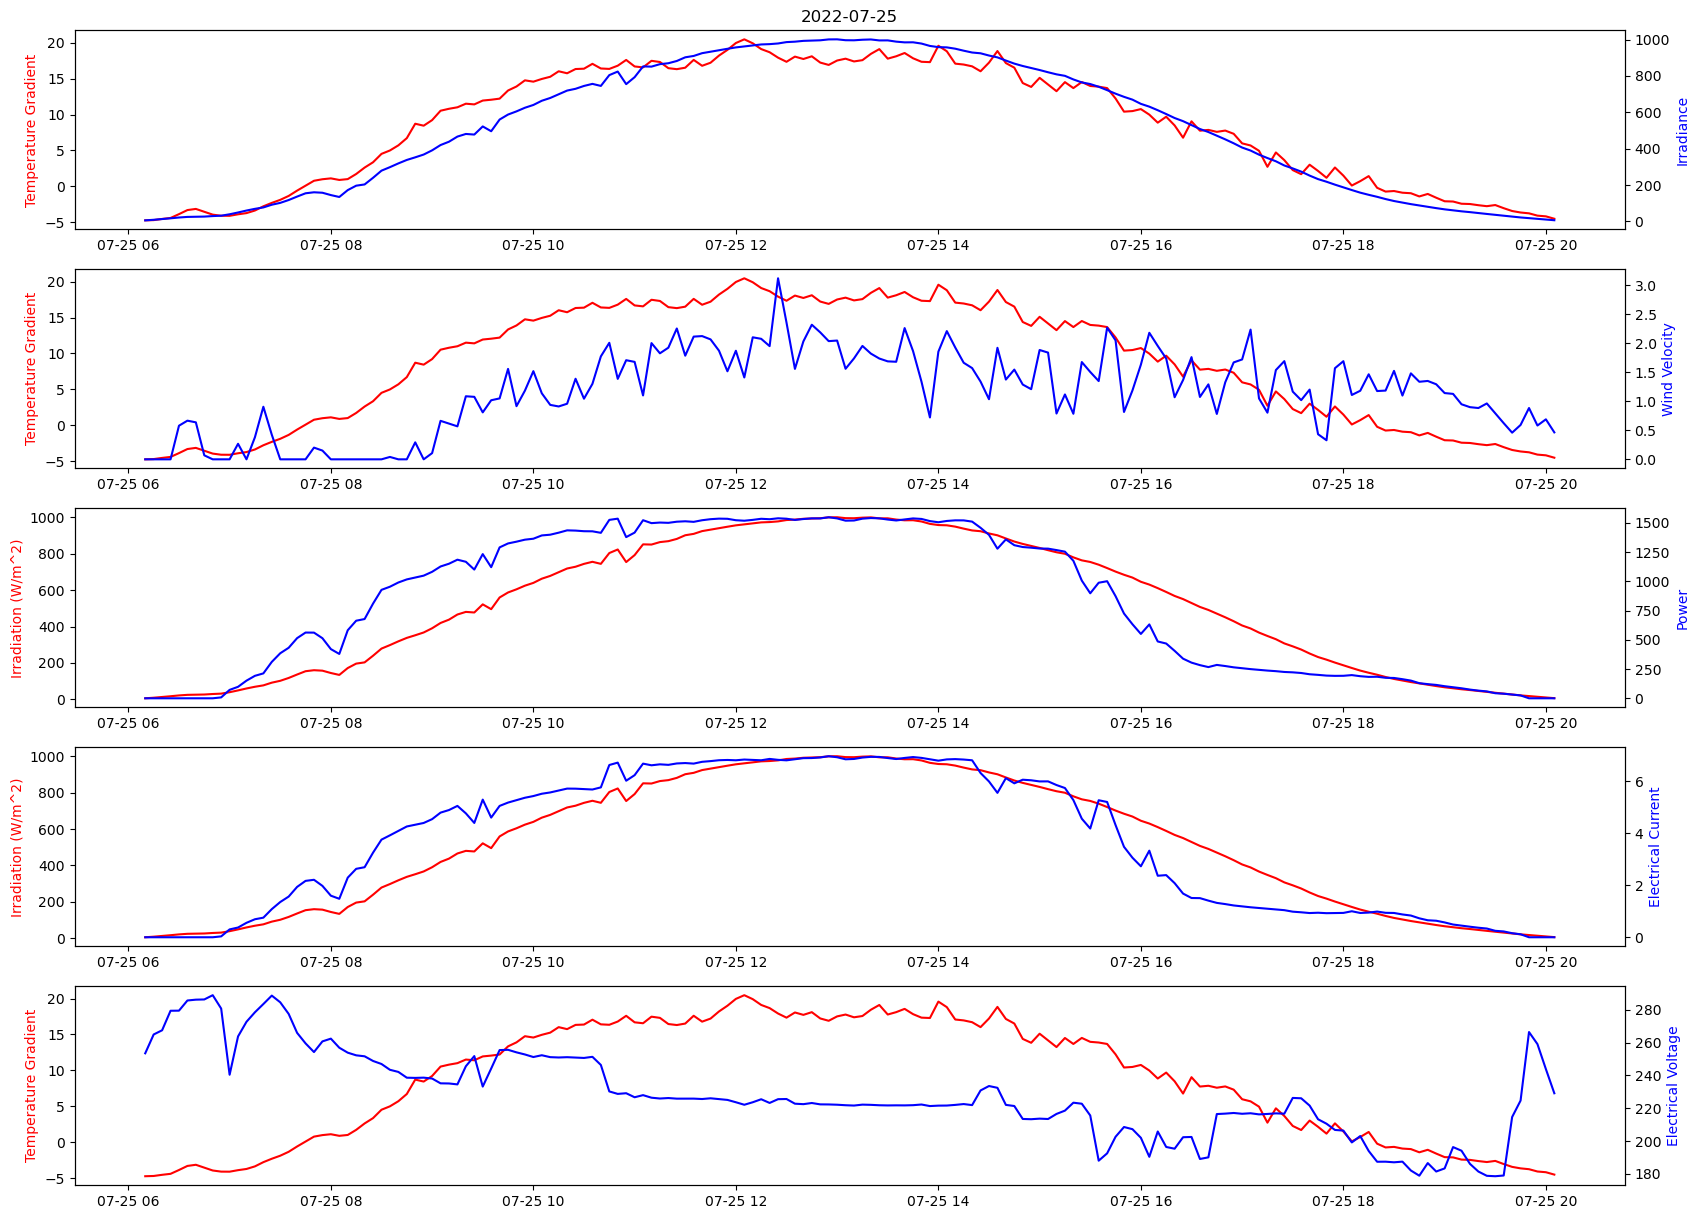

In [3]:
# Plotting the parameters based to see their correlations
for day in range(15,26):
    condition = (df['Datetime']>=f'2022-07-{day}')&(df['Datetime']<f'2022-07-{day+1}')
    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,15))
    ax1.set_title(f'2022-07-{day}')

    ax1.plot(df.loc[condition,'Datetime'],df.loc[condition,'TmpMdul C (°C)']-df.loc[condition,'TmpAmb C (°C)'],color='red')
    ax1.set_ylabel('Temperature Gradient')
    ax1.yaxis.label.set_color('red')
    ax1_prime = ax1.twinx()
    ax1_prime.plot(df.loc[condition,'Datetime'],df.loc[condition,'IntSolIrr (W/m^2)'],color='Blue')
    ax1_prime.set_ylabel('Irradiance')
    ax1_prime.yaxis.label.set_color('blue')

    ax2.plot(df.loc[condition,'Datetime'],df.loc[condition,'TmpMdul C (°C)']-df.loc[condition,'TmpAmb C (°C)'],color='red')
    ax2.set_ylabel('Temperature Gradient')
    ax2.yaxis.label.set_color('red')
    ax2_prime = ax2.twinx()
    ax2_prime.plot(df.loc[condition,'Datetime'],df.loc[condition,'WindVel m/s (m/s)'],color='blue')
    ax2_prime.set_ylabel('Wind Velocity')
    ax2_prime.yaxis.label.set_color('blue')
    
    ax3.plot(df.loc[condition,'Datetime'],df.loc[condition,'IntSolIrr (W/m^2)'],color='red')
    ax3.set_ylabel('Irradiation (W/m^2)')
    ax3.yaxis.label.set_color('red')
    ax3_prime = ax3.twinx()
    ax3_prime.plot(df.loc[condition,'Datetime'],df.loc[condition,'A.Ms.Watt (W)'],color='blue')
    ax3_prime.set_ylabel('Power')
    ax3_prime.yaxis.label.set_color('blue')
    
    ax4.plot(df.loc[condition,'Datetime'],df.loc[condition,'IntSolIrr (W/m^2)'],color='red')
    ax4.set_ylabel('Irradiation (W/m^2)')
    ax4.yaxis.label.set_color('red')
    ax4_prime = ax4.twinx()
    ax4_prime.plot(df.loc[condition,'Datetime'],df.loc[condition,'A.Ms.Amp (A)'],color='blue')
    ax4_prime.set_ylabel('Electrical Current')
    ax4_prime.yaxis.label.set_color('blue')
    
    ax5.plot(df.loc[condition,'Datetime'],df.loc[condition,'TmpMdul C (°C)']-df.loc[condition,'TmpAmb C (°C)'],color='red')
    ax5.set_ylabel('Temperature Gradient')
    ax5.yaxis.label.set_color('red')
    ax5_prime = ax5.twinx()
    ax5_prime.plot(df.loc[condition,'Datetime'],df.loc[condition,'A.Ms.Vol (V)'],color='blue')
    ax5_prime.set_ylabel('Electrical Voltage')
    ax5_prime.yaxis.label.set_color('blue')

In [4]:
df.insert(0,'hour',df['Datetime'].dt.hour)
df.insert(0,'day_of_week',df['Datetime'].dt.dayofweek)
df.insert(0,'day_of_year',df['Datetime'].dt.dayofyear)
df.insert(0,'month',df['Datetime'].dt.month)

df.set_index('Datetime',inplace=True);

df.drop(columns=['A.Ms.Amp (A)','A.Ms.Vol (V)'],inplace=True)

In [5]:
df

,month,day_of_year,day_of_week,hour,IntSolIrr (W/m^2),TmpAmb C (°C),TmpMdul C (°C),WindVel m/s (m/s),A.Ms.Watt (W)
Datetime,,,,,,,,,
2022-01-17 10:45:00,1,17,0,10,112.290,4.270,2.940,1.980,242.330
2022-01-17 10:50:00,1,17,0,10,106.260,4.410,3.150,2.110,231.760
2022-01-17 10:55:00,1,17,0,10,92.130,4.470,3.180,1.450,203.970
2022-01-17 11:00:00,1,17,0,11,87.380,4.350,3.050,1.330,196.120
2022-01-17 11:05:00,1,17,0,11,76.240,4.190,2.800,2.400,168.860
...,...,...,...,...,...,...,...,...,...
2022-09-06 16:40:00,9,249,1,16,441.929,35.510,42.212,1.533,632.744
2022-09-06 16:45:00,9,249,1,16,419.476,35.238,41.607,1.762,700.762
2022-09-06 16:50:00,9,249,1,16,402.556,36.450,41.317,1.281,750.389


# LSTM

In [6]:
# Generating input x and y values based on input dataframe and window size
def df_to_X_y(df,window_size):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_as_np_x = scaler.fit_transform(df)
    df_as_np_y = df['A.Ms.Watt (W)'].values
    
    X = []
    y = []
    for i in range(window_size,len(df_as_np_x)):
        row = [a for a in df_as_np_x[i-window_size:i]]
        X.append(row)
        label = df_as_np_y[i]
        y.append(label)
        
    return np.array(X), np.array(y)



# Window size is the number of time-step previous y-values as input features for the next time-step forecasting 

WINDOW_SIZE = 3

def split_train_test_PVforecast_model():
    global train_size,val_size,test_size
    X,y = df_to_X_y(df,WINDOW_SIZE)
    
    # Split the data
    train_size = int(len(df) * 0.90)
    test_size  = int(len(df) * 0.05)
    val_size   = len(df) - train_size - test_size
    X_train, X_val, X_test = X[:train_size],X[train_size:train_size+val_size],X[train_size+val_size:train_size+val_size+test_size]
    y_train, y_val, y_test = y[:train_size],y[train_size:train_size+val_size],y[train_size+val_size:train_size+val_size+test_size]
    
    return X_train,X_val,X_test,y_train,y_val,y_test,test_size

In [7]:
X_train,X_val,X_test,y_train,y_val,y_test,test_size  = split_train_test_PVforecast_model()
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import R2Score

from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((WINDOW_SIZE,len(df.columns))))
model.add(LSTM(256))
model.add(Dense(64,'relu'))
model.add(Dense(1,'linear'))

model.summary()

C:\Users\ACER\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               272384    
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 288897 (1.10 MB)
Trainable params: 288897 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5

1008/1009 [============================>.] - ETA: 0s - loss: 1078808.3750 - root_mean_squared_error: 1038.6570INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1009/1009 [==============================] - 10s 8ms/step - loss: 1078539.8750 - root_mean_squared_error: 1038.5277 - val_loss: 819801.1875 - val_root_mean_squared_error: 905.4287
Epoch 2/5
1008/1009 [============================>.] - ETA: 0s - loss: 478392.5938 - root_mean_squared_error: 691.6593INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1009/1009 [==============================] - 7s 7ms/step - loss: 478273.0312 - root_mean_squared_error: 691.5729 - val_loss: 276437.9375 - val_root_mean_squared_error: 525.7737
Epoch 3/5
1002/1009 [============================>.] - ETA: 0s - loss: 157862.4688 - root_mean_squared_error: 397.3191INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1009/1009 [==============================] - 7s 7ms/step - loss: 157463.1719 - root_mean_squared_error: 396.8163 - val_loss: 63679.7891 - val_root_mean_squared_error: 252.3485
Epoch 4/5
1000/1009 [============================>.] - ETA: 0s - loss: 57698.4414 - root_mean_squared_error: 240.2050INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1009/1009 [==============================] - 7s 7ms/step - loss: 57487.5820 - root_mean_squared_error: 239.7657 - val_loss: 22954.4160 - val_root_mean_squared_error: 151.5071
Epoch 5/5
1009/1009 [==============================] - ETA: 0s - loss: 36322.8164 - root_mean_squared_error: 190.5855INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1009/1009 [==============================] - 7s 7ms/step - loss: 36322.8164 - root_mean_squared_error: 190.5855 - val_loss: 17108.4023 - val_root_mean_squared_error: 130.7991


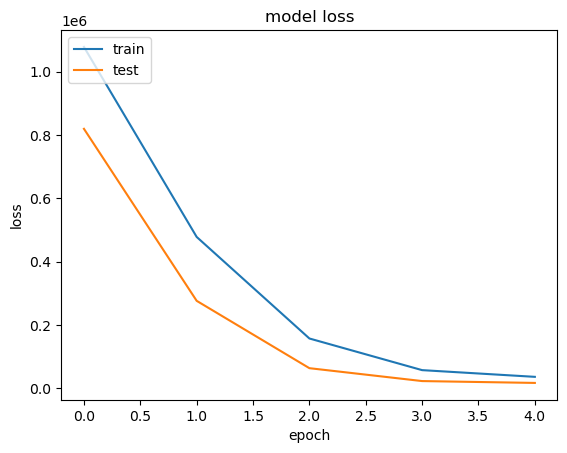

In [8]:
cp = ModelCheckpoint('model1/',save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5,callbacks=[cp])


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'test Predictions':test_predictions, 'Actuals':y_test})
test_results.set_index(df.tail(len(X_test)).index,inplace=True)

test_results

56/56 [==============================] - 0s 2ms/step


,test Predictions,Actuals
Datetime,,
2022-08-26 11:00:00,1714.765259,1778.619
2022-08-26 11:05:00,1714.711060,1791.244
2022-08-26 11:10:00,1714.966553,1797.405
2022-08-26 11:15:00,1712.036987,1806.071
2022-08-26 11:20:00,1712.736938,1801.548
...,...,...
2022-09-06 16:40:00,466.082581,632.744
2022-09-06 16:45:00,533.879700,700.762
2022-09-06 16:50:00,498.398651,750.389


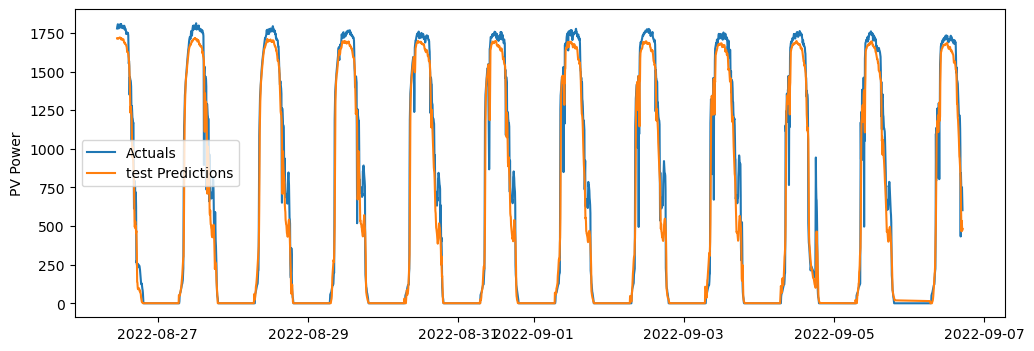

In [10]:
from sklearn.metrics import r2_score
metric = np.round(100*r2_score(test_results['Actuals'],test_results['test Predictions']),2)

plt.figure(figsize=(12,4))
plt.plot(test_results.index,test_results['Actuals'],label='Actuals')
plt.plot(test_results.index,test_results['test Predictions'],label='test Predictions')
plt.ylabel('PV Power')
plt.legend()
plt.show()